In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from IPython.display import clear_output
from datetime import datetime, timedelta
import time
pd.options.display.max_rows = 999

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [3]:
# path = 'Mode_train-Model_gradient_boosting-TrainWw_480-TrainPd_24-TradingStgy_bband_strategy-PeriodsFwTg_5-SL_10-RR_2-UseDaysClose_False'
# path = 'Mode_train-Model_random_forest-TrainWw_960-TrainPd_24-TradingStgy_bband_strategy-PeriodsFwTg_5-SL_15-RR_3-UseDaysClose_False'
# path = 'Mode_train-Model_random_forest-TrainWw_1440-TrainPd_24-TradingStgy_macd_strategy-PeriodsFwTg_3-SL_10-RR_3-UseDaysClose_False'
# path = 'Mode_train-Model_gradient_boosting-TrainWw_960-TrainPd_24-TradingStgy_bband_strategy-PeriodsFwTg_10-SL_15-RR_3-UseDaysClose_False'
# path = 'Mode_train-Model_gradient_boosting-TrainWw_960-TrainPd_24-TradingStgy_bband_strategy-PeriodsFwTg_10-SL_20-RR_4-UseDaysClose_False'

path = 'Mode_train-Model_gradient_boosting-TrainWw_960-TrainPd_24-TradingStgy_bband_strategy-PeriodsFwTg_10-SL_20-RR_5-UseDaysClose_False'

orders = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'orders.csv'))
wallet = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'wallet.csv'))


In [4]:
orders.head(50)

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,1f4c2259-1ef3-11ef-b161-c73def676cf0,GBPUSD,OperationType.BUY,2023-01-02 12:00:00,2023-01-03 09:00:00,1.20524,1.20629,1.20429,-4.75000,1.20429,1.21524,5000,-0.00095,ClosePositionType.STOP_LOSS
1,1f56dc27-1ef3-11ef-9163-c73def676cf0,AUDUSD,OperationType.SELL,2023-01-02 13:00:00,2023-01-03 11:00:00,0.68050,0.67126,0.67050,50.00000,0.67326,0.67050,5000,0.01000,ClosePositionType.TAKE_PROFIT
2,1f6c9f94-1ef3-11ef-a49d-c73def676cf0,USDCAD,OperationType.SELL,2023-01-02 15:00:00,2023-01-03 10:00:00,1.35753,1.35365,1.35565,9.40000,1.35565,1.34753,5000,0.00188,ClosePositionType.STOP_LOSS
3,1f75afd0-1ef3-11ef-b011-c73def676cf0,EURUSD,OperationType.BUY,2023-01-02 16:00:00,2023-01-02 18:00:00,1.06725,1.06725,1.06525,-10.00000,1.06525,1.07725,5000,-0.00200,ClosePositionType.STOP_LOSS
4,1f75fdb9-1ef3-11ef-8667-c73def676cf0,USDCHF,OperationType.SELL,2023-01-02 16:00:00,2023-01-03 09:00:00,0.92539,0.92464,0.92664,-6.25000,0.92664,0.91539,5000,-0.00125,ClosePositionType.STOP_LOSS
5,1f98bcf8-1ef3-11ef-9144-c73def676cf0,EURUSD,OperationType.BUY,2023-01-02 19:00:00,2023-01-03 09:00:00,1.06607,1.06607,1.06407,-9.90000,1.06407,1.07607,4950,-0.00200,ClosePositionType.STOP_LOSS
6,20d5a481-1ef3-11ef-a315-c73def676cf0,USDJPY,OperationType.BUY,2023-01-03 15:00:00,2023-01-03 16:00:00,130.65500,130.65500,130.45500,-10.20000,130.45500,131.65500,51,-0.20000,ClosePositionType.STOP_LOSS
7,20e10786-1ef3-11ef-afff-c73def676cf0,GBPUSD,OperationType.SELL,2023-01-03 16:00:00,2023-01-03 20:00:00,1.20299,1.19642,1.19842,23.49894,1.19842,1.19299,5142,0.00457,ClosePositionType.STOP_LOSS
8,220ca4f4-1ef3-11ef-813a-c73def676cf0,USDJPY,OperationType.BUY,2023-01-04 08:00:00,2023-01-04 09:00:00,130.73000,130.73000,130.53000,-10.40000,130.53000,131.73000,52,-0.20000,ClosePositionType.STOP_LOSS
9,22164de2-1ef3-11ef-8859-c73def676cf0,GBPUSD,OperationType.SELL,2023-01-04 09:00:00,2023-01-04 10:00:00,1.20268,1.20268,1.20468,-10.41800,1.20468,1.19268,5209,-0.00200,ClosePositionType.STOP_LOSS


# Cantidad de compras y ventas

In [5]:
orders.operation_type.value_counts()

operation_type
OperationType.BUY     278
OperationType.SELL    263
Name: count, dtype: int64

# Cierres por SL y TP

In [6]:
orders.comment.value_counts()

comment
ClosePositionType.STOP_LOSS      507
ClosePositionType.TAKE_PROFIT     31
Name: count, dtype: int64

# Cierres por SL que terminaron positivos

In [7]:
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.35502958579881655

# Cierres por SL en que se minimizaron las perdidas

In [8]:
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.6686390532544378

# Desempenio por ticker

In [9]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
2,GBPUSD,42,49,623.85019,46.153846
4,USDCHF,39,46,476.85803,45.882353
0,AUDUSD,37,53,379.72253,41.111111
3,USDCAD,30,53,205.40375,36.144578
5,USDJPY,39,74,156.07100,34.513274
1,EURUSD,22,52,131.08122,29.729730


# Rendimiento por mes

In [10]:
orders_per_month = orders[['close_time','profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day


orders_per_month_gb = orders_per_month.groupby(by=['year','month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    profit_sum=('profit', 'sum'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0],'amount_ops':[0], 'profit_sum':[1000]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

,year,month,amount_ops,good_ops,bad_ops,perc_good_ops,profit_sum,profit_cumsum,perc_change
0,2023.0,0.0,0,NaN,NaN,NaN,1000.000,1000.000,NaN
0,2023.0,1.0,64,24.0,40.0,37.500,176.620,1176.620,0.150
1,2023.0,2.0,78,24.0,53.0,30.769,-103.524,1073.096,-0.096
2,2023.0,3.0,61,20.0,41.0,32.787,44.896,1117.993,0.040
3,2023.0,4.0,30,13.0,17.0,43.333,58.714,1176.706,0.050
4,2023.0,5.0,38,16.0,22.0,42.105,23.615,1200.321,0.020
5,2023.0,6.0,42,14.0,28.0,33.333,137.837,1338.158,0.103
6,2023.0,7.0,46,19.0,27.0,41.304,202.139,1540.297,0.131
7,2023.0,8.0,46,18.0,27.0,39.130,52.131,1592.428,0.033
8,2023.0,9.0,35,13.0,22.0,37.143,255.024,1847.453,0.138


In [11]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 5000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.000,5000.000000
1,0.150,5750.000000
2,-0.096,5198.000000
3,0.040,5405.920000
4,0.050,5676.216000
5,0.020,5789.740320
6,0.103,6386.083573
7,0.131,7222.660521
8,0.033,7461.008318
9,0.138,8490.627466


# Rendimiento por dia

In [12]:
orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    profit_sum=('profit', 'sum'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[1000]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'day', 
    'amount_ops', 
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

,year,month,day,amount_ops,good_ops,bad_ops,perc_good_ops,profit_sum,profit_cumsum,perc_change
21,2023.0,2.0,1.0,1,0.0,1.0,0.000,-11.800,1164.820,-0.010
22,2023.0,2.0,3.0,5,3.0,1.0,60.000,81.762,1246.583,0.066
23,2023.0,2.0,6.0,12,2.0,10.0,16.667,-68.401,1178.182,-0.058
24,2023.0,2.0,7.0,14,5.0,9.0,35.714,-32.900,1145.282,-0.029
25,2023.0,2.0,8.0,1,0.0,1.0,0.000,-11.452,1133.830,-0.010
26,2023.0,2.0,9.0,3,2.0,1.0,66.667,3.475,1137.305,0.003
27,2023.0,2.0,10.0,1,0.0,1.0,0.000,-11.374,1125.931,-0.010
28,2023.0,2.0,13.0,3,1.0,2.0,33.333,10.177,1136.109,0.009
29,2023.0,2.0,14.0,5,1.0,4.0,20.000,-15.540,1120.569,-0.014
30,2023.0,2.0,15.0,4,0.0,4.0,0.000,-32.604,1087.965,-0.030


2023-01-31


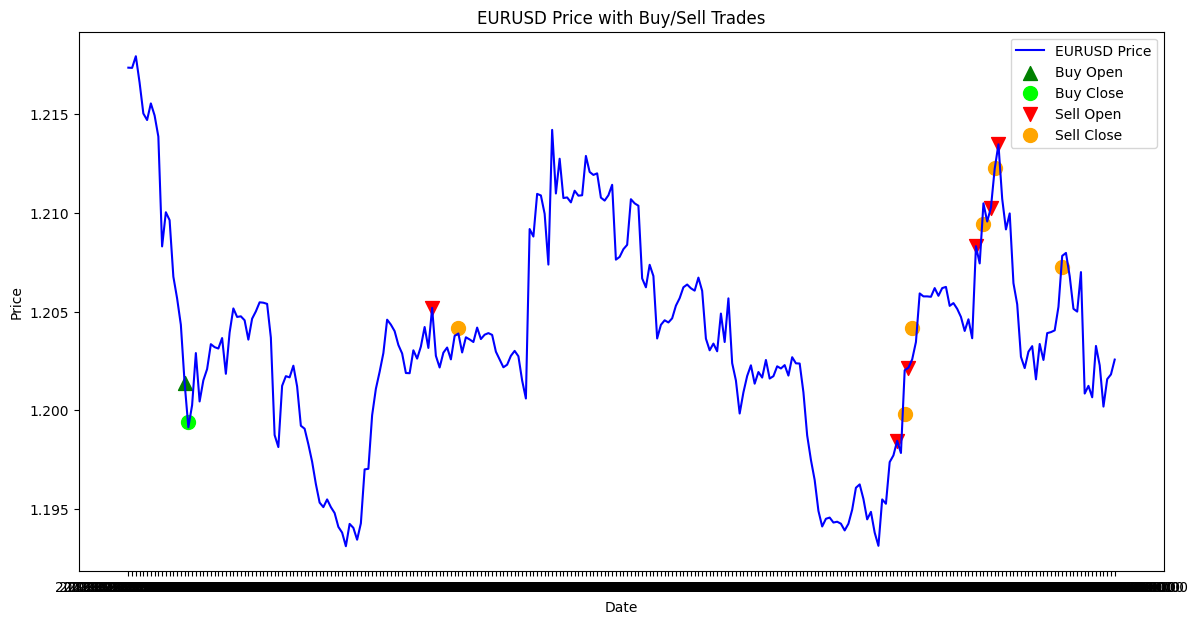

KeyboardInterrupt: 

In [13]:
ticker = 'GBPUSD'
date_from = datetime(2023,1,1)
date_to = date_from + timedelta(days=15)

while date_to < datetime(2024,1,1):
    date_from_str = date_from.strftime('%Y-%m-%d')
    date_to_str = date_to.strftime('%Y-%m-%d')

    historical_prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
    historical_prices = historical_prices[
        (historical_prices['Date']>date_from_str)
        & (historical_prices['Date']<date_to_str)
    ]
    
    plt.figure(figsize=(14, 7))
    plt.plot(historical_prices['Date'], historical_prices['Close'], label='EURUSD Price', color='blue')
    
    # Añadir las operaciones de compra y venta
    buy_trades = orders[
        (orders['operation_type']=='OperationType.BUY') 
        & (orders['close_time']>date_from_str)
        & (orders['close_time']<date_to_str)
        & (orders['ticker']==ticker)
    ]
    sell_trades = orders[
        (orders['operation_type']=='OperationType.SELL') 
        & (orders['close_time']>date_from_str)
        & (orders['close_time']<date_to_str)
        & (orders['ticker']==ticker)
    ]
    
    # Graficar las operaciones de compra
    plt.scatter(buy_trades['open_time'], buy_trades['open_price'], color='green', marker='^', s=100, label='Buy Open')
    plt.scatter(buy_trades['close_time'], buy_trades['close_price'], color='lime', marker='o', s=100, label='Buy Close')
    
    # Graficar las operaciones de venta
    plt.scatter(sell_trades['open_time'], sell_trades['open_price'], color='red', marker='v', s=100, label='Sell Open')
    plt.scatter(sell_trades['close_time'], sell_trades['close_price'], color='orange', marker='o', s=100, label='Sell Close')
    
    # Añadir etiquetas y leyenda
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('EURUSD Price with Buy/Sell Trades')
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()
    
    time.sleep(8)
    clear_output(wait=True)

    date_from += timedelta(days=15)
    date_to += timedelta(days=15)
    print(date_from_str)

In [ ]:
orders_per_month = orders[['close_time','comment', 'ticker']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month.groupby(by=['year','month','day','ticker', 'comment']).agg({'comment':'count'})

# Que hubiera pasado si no se operaba con algunos tickers?

In [14]:
# tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
# tickers_permitidos

tickers_permitidos = [
    'EURUSD', 
    'GBPUSD', 
    'USDJPY', 
    'USDCAD', 
    'AUDUSD', 
    'USDCHF'
]

orders_min = orders[orders['ticker'].isin(tickers_permitidos)].copy().reset_index()



# Rendimiento por mes

In [15]:
orders_per_month = orders_min[['close_time','profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month


orders_per_month = orders_per_month.groupby(by=['year','month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    profit_sum=('profit', 'sum'),

).reset_index()

orders_per_month = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0],'amount_ops':[0], 'profit_sum':[1000]}), 
    orders_per_month
])

orders_per_month['cumsum'] = orders_per_month['profit_sum'].cumsum()

orders_per_month['perc_change'] = ((orders_per_month['cumsum'] - orders_per_month['cumsum'].shift(1)) / orders_per_month['cumsum'])

orders_per_month['perc_change'] = orders_per_month['perc_change'].round(4)


orders_per_month['perc_good_ops'] = (orders_per_month['good_ops'] / orders_per_month['amount_ops']) * 100

orders_per_month[[
    'year', 
    'month', 
    'amount_ops', 
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'profit_sum', 
    'cumsum', 
    'perc_change', 
]].round(4)

,year,month,amount_ops,good_ops,bad_ops,perc_good_ops,profit_sum,cumsum,perc_change
0,2023.0,0.0,0,NaN,NaN,NaN,1000.0000,1000.0000,NaN
0,2023.0,1.0,64,24.0,40.0,37.5000,176.6202,1176.6202,0.1501
1,2023.0,2.0,78,24.0,53.0,30.7692,-103.5240,1073.0962,-0.0965
2,2023.0,3.0,61,20.0,41.0,32.7869,44.8963,1117.9925,0.0402
3,2023.0,4.0,30,13.0,17.0,43.3333,58.7140,1176.7065,0.0499
4,2023.0,5.0,38,16.0,22.0,42.1053,23.6147,1200.3212,0.0197
5,2023.0,6.0,42,14.0,28.0,33.3333,137.8373,1338.1585,0.1030
6,2023.0,7.0,46,19.0,27.0,41.3043,202.1387,1540.2972,0.1312
7,2023.0,8.0,46,18.0,27.0,39.1304,52.1312,1592.4284,0.0327
8,2023.0,9.0,35,13.0,22.0,37.1429,255.0242,1847.4525,0.1380


<Axes: >

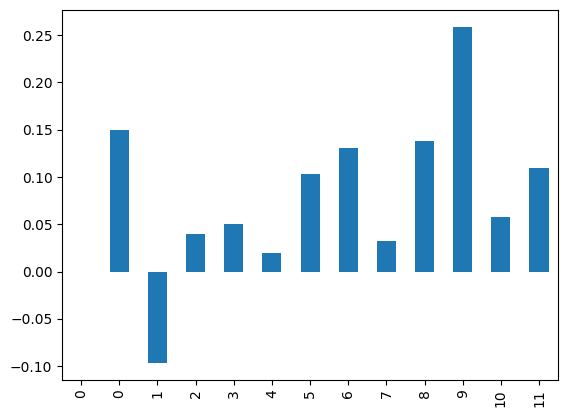

In [16]:
orders_per_month.perc_change.plot.bar()

In [17]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = 1000 + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [18]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
2,GBPUSD,42,49,623.85019,0.461538
4,USDCHF,39,46,476.85803,0.458824
0,AUDUSD,37,53,379.72253,0.411111
3,USDCAD,30,53,205.40375,0.361446
5,USDJPY,39,74,156.07100,0.345133
1,EURUSD,22,52,131.08122,0.297297


In [19]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.35502958579881655

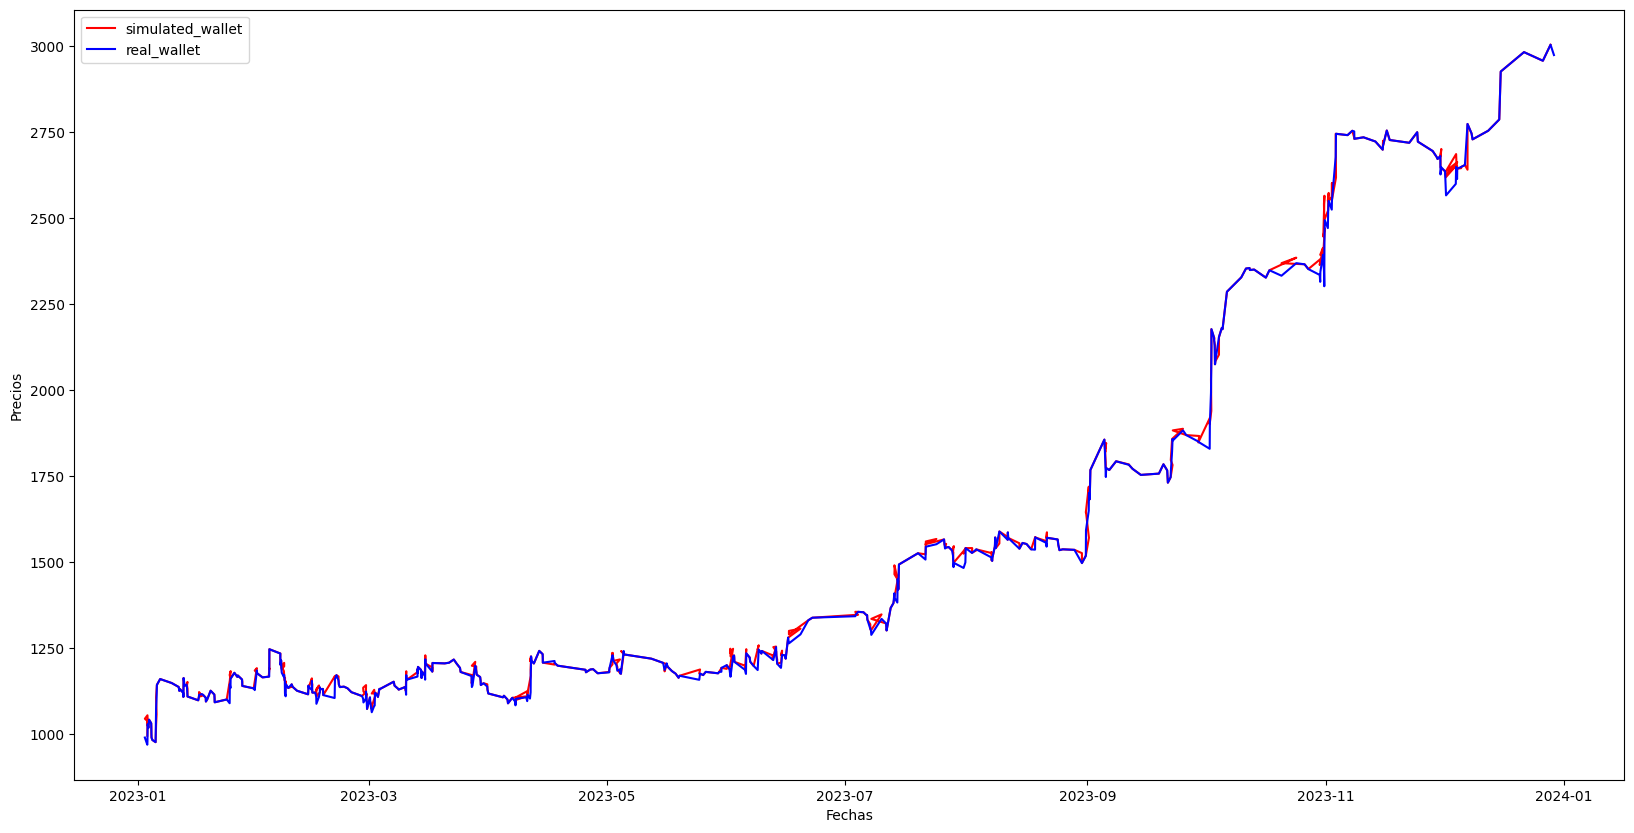

In [20]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
true_values = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'test_res.csv'))

In [ ]:
import seaborn as sns

In [ ]:
sns.displot(data=predictions[(predictions['y_pred']==2) & (predictions['y_true']!=2)], x="proba")

In [ ]:
sns.displot(data=predictions[(predictions['y_pred']==1) & (predictions['y_true']!=1)], x="proba")

In [ ]:
sns.displot(data=predictions[(predictions['y_pred']==1) & (predictions['y_true']==1)], x="proba")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(predictions['y_true'], predictions['y_pred']))

In [ ]:
threshold = 0.9

In [ ]:


from sklearn.metrics import precision_score, f1_score, recall_score

with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()